# 3 Pre-processing and Modelling<a id='4_Pre-Processing_and_Training_Data'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Pre-Processing and Training Data](#3_Pre-Processing_and_Training_Data)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load data](#3.3_Load_Data)
  * [3.5 Pre-Processing Data](#3.5_set_the_index)
  * [3.6 Build the Base Model](#3.6_Build_Model)
      * [3.6.1 Model Architecture](#3.6.1_Model_Architecture)
  * [3.7 Define a Callback Object](#3.7_Define_Callback)
  * [3.8 The Model with the Adam Optimizer](#3.8_Adam_Optimizer)
       * [3.8.1 Hyperparameter search using RandomSearch](#3.8.1_Hyperparameter_RandomSearch) 
       * [3.8.2 Learning Curves](#3.8.2_Learning_Curve) 
       * [3.8.3 Model Performance](#3.8.3_Model_Performance) 
  * [3.9 The Model with the SGD Optimizer](#3.9_SGD_Optimizer)
      * [3.9.1 Hyperparameter search using RandomSearch](#3.9.1_Hyperparameter_RandomSearch)
      * [3.9.2 Learning Curves](#3.9.2_Learning_Curve) 
      * [3.9.3 Model Performance](#3.9.3_Model_Performance) 
  * [3.10 The Model with the AdaGrad Optimizer](#3.10_Adagrad_Optimizer)
      * [3.10.1 Hyperparameter search using RandomSearch](#3.10.1_Hyperparameter_RandomSearch)
      * [3.10.2 Learning Curves](#3.10.2_Learning_Curve)
      * [3.10.3 Model Performance](#3.10.3_Model_Performance)   
  * [3.11 Final Model Selection](#3.11_final_model_selection)
  

## 3.2 Introduction<a id='3.2_Introduction'></a>

In preceding notebooks, we transformed data from one "raw" data form into another format in order to to make it more appropriate and valuable for our analysis. In this step we will do the followings:

  * Data Pre-Processing
  * Build Models With Different Optimizers
  * Compare the performance of the models
  * Pick the Best of the Models
  
  

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import missingno as msno
import warnings
warnings.filterwarnings(action='ignore')
#from library.sb_utils import save_file
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from PIL import Image

from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score,confusion_matrix
from keras.callbacks import ReduceLROnPlateau


from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score,accuracy_score, mean_squared_error, mean_absolute_error, precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

%matplotlib inline



## 3.4 Load data<a id='3.4_Load_Data'></a>

In [2]:
df_train = pd.read_csv('sign_mnist_train.csv')
df_test = pd.read_csv('sign_mnist_test.csv')

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [5]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


## 3.5 Data Pre-Processing<a id='3.5_Data_Pre-Processing'></a>

We take the following data pre-processing steps in our project:

* Analyzing the labels and making sure that dataset is balanced.
* Converting arrays to images (tensors). 
* Performing one hot encoding for the labels.
* Augmenting the data

In [7]:
y_train=df_train['label']
y_test=df_test['label']

In [8]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [9]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [10]:
X_train=df_train.drop(columns=['label']).values
X_test=df_test.drop(columns=['label']).values

In [11]:
X_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [12]:
X_train.shape

(27455, 784)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [15]:
X_train.shape

(27455, 28, 28, 1)

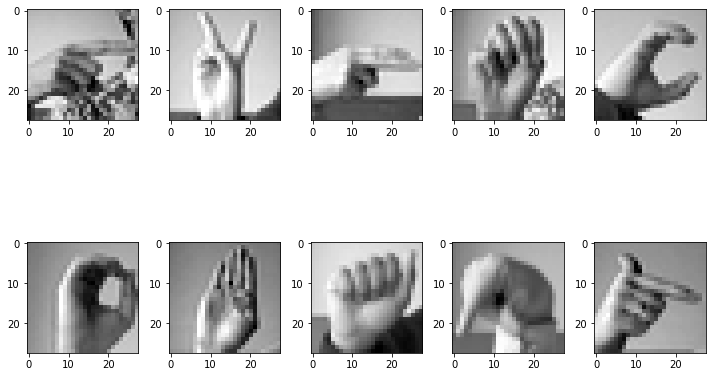

In [16]:
random_10, ax = plt.subplots(2,5) 
random_10.set_size_inches(10, 10)

for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[random.randint(0, 27445)].reshape(28, 28) , cmap = "gray")       
    plt.tight_layout()  

In [17]:
data_augmented = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  # Randomly rotates images in 10 degrees
        zoom_range = 0.1, # Randomly zoom images by %10 
        width_shift_range=0.1,  # Randomly shift images horizontally 
        height_shift_range=0.1,  # Randomly shift images vertically 
        horizontal_flip=False,  
        vertical_flip=False)  

data_augmented.fit(X_train)

## 3.6 Build the Base Model<a id='3.6_Build_Model'></a>

We build a CNN model to classify images. We have the following in our model:

* Conv2D layers with activation function "relu":
    * In the first and the last conv2D layer we set strides=1 and padding="same" which means the input and output will have the same size and the filter will shift by one.

* Batch normalization - to normalize the inputs of each layer in order to fight the internal covariate shift problem.

* Max Pooling with 2×2 pixels applied with a stride of 2 pixels - to calculate the maximum value for each patch of the feature map. This will also reduce the size of each feature map by a factor of 2.

* Droupout, a regularization technique - to prevent neural networks from overfitting.

* Flatten layer - to convert the input data into a long vector in order to pass the input through the artificial neural network to be processed further.

* Dense layers - to connect the neurons of the layer to every neuron of its preceding layer. 

In [18]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy' , metrics = ['accuracy'])
#model.summary()

## 3.6.1 Model Architecture<a id='3.6.1_Model_Architecture'></a>

Next, we convert the model to dot format and save it to a file.

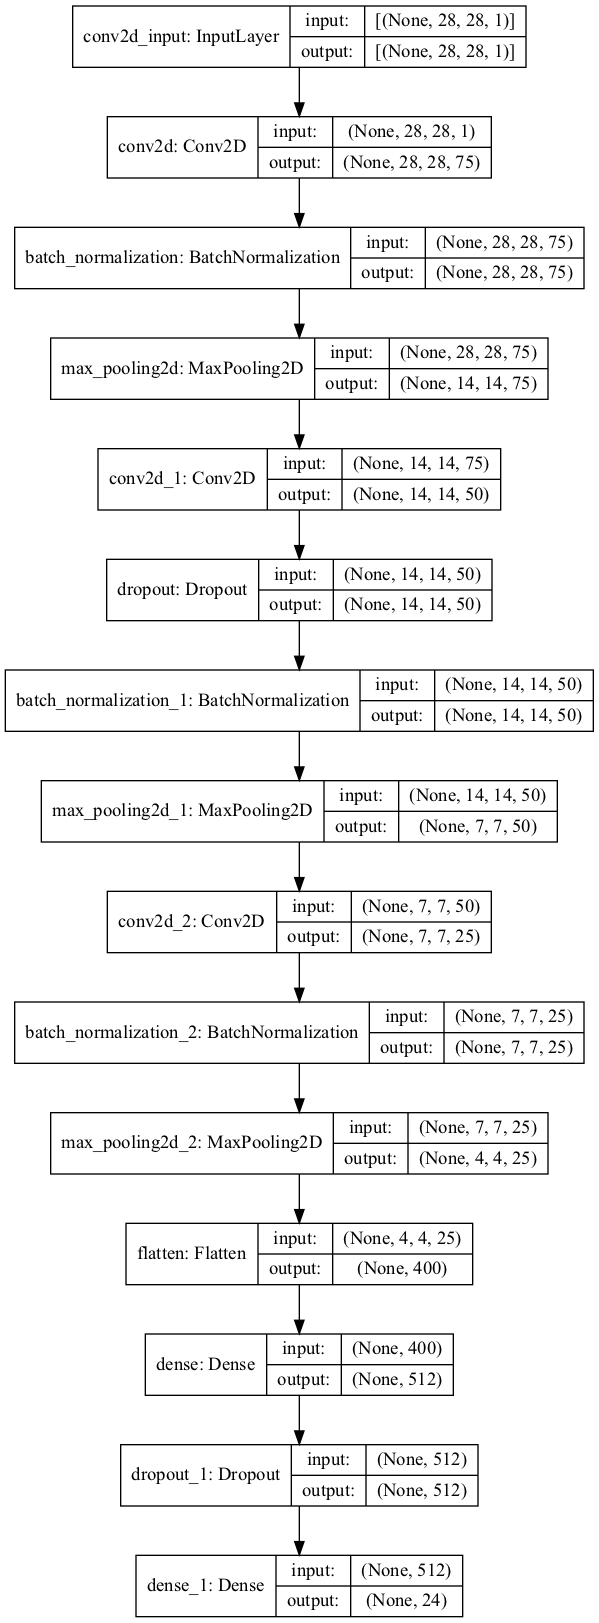

In [19]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
)

## 3.7 Define a Callback Object<a id='3.7_Define_Callback'></a>

Models often benefit from reducing the learning rate by a factor of 5-10 once learning stagnates. We will define a callback object that performs actions at various stages of training in order to monitor a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced (see below for the details).

In [20]:
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, verbose=1, min_lr=0.00001)

We try out multiple optimizers when we compile our model to determine the optimizer with the best performance. We try the following optimizers:

* adam
* SGD
* AdaGrad  

In [21]:
Optimizer1 = keras.optimizers.Adam()
Optimizer2 = keras.optimizers.SGD()
Optimizer3 = keras.optimizers.Adagrad()

## 3.8 Model with Optimizer Adam<a id='3.8_Adam_Optimizer'></a>

In this section we use our base model with optimizer Adam.

In [22]:
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Flatten())
    model.add(Dense(units = 512 , activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units = 24 , activation = 'softmax'))
    model.compile(optimizer = Optimizer1, loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    return model

## 3.8.1 Hyperparameter Search using RandomSearch<a id='3.8.1_Hyperparameter_RandomSearch'></a>

Next, we will tune some of the hyperparameters using `keras-tuner`.

In [23]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy', directory='output1', max_trials=5)

In [24]:
tuner_search.search(X_train,y_train, batch_size = 128, 
                    epochs=10, validation_data = (X_test, y_test))

Trial 1 Complete [00h 08m 11s]
val_accuracy: 0.9714165925979614

Best val_accuracy So Far: 0.9714165925979614
Total elapsed time: 00h 08m 11s
INFO:tensorflow:Oracle triggered exit


We extract the best model from `tuner_search` object.

In [25]:
model_best=tuner_search.get_best_models(num_models=1)[0] #this will give us the best tuned model

In [26]:
tuner_search.results_summary()

Results summary
Results in output1/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
default configuration
Score: 0.9714165925979614


Next, we fit the best model to the augmented data.

In [27]:

model_best_optimizer1 = model_best.fit(data_augmented.flow(X_train,y_train, batch_size = 128) ,epochs = 15 , 
                                       validation_data = (X_test, y_test), callbacks=[reduce_learning_rate])


Epoch 1/15
215/215 [==============================] - 53s 246ms/step - loss: 0.5048 - accuracy: 0.8568 - val_loss: 0.6132 - val_accuracy: 0.8065
Epoch 2/15
215/215 [==============================] - 49s 226ms/step - loss: 0.0849 - accuracy: 0.9730 - val_loss: 0.0449 - val_accuracy: 0.9837
Epoch 3/15
215/215 [==============================] - 54s 251ms/step - loss: 0.0436 - accuracy: 0.9861 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 4/15
215/215 [==============================] - 49s 229ms/step - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.0666 - val_accuracy: 0.9791
Epoch 5/15
215/215 [==============================] - 49s 227ms/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0143 - val_accuracy: 0.9954
Epoch 6/15
215/215 [==============================] - 49s 230ms/step - loss: 0.0254 - accuracy: 0.9911 - val_loss: 0.0118 - val_accuracy: 0.9964
Epoch 7/15
215/215 [==============================] - 49s 227ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0043 - val_ac

## 3.8.2 Learning Curves<a id='3.8.2_Learning_Curve'></a>

We visualize the performance of the best model with respect to each epoch.

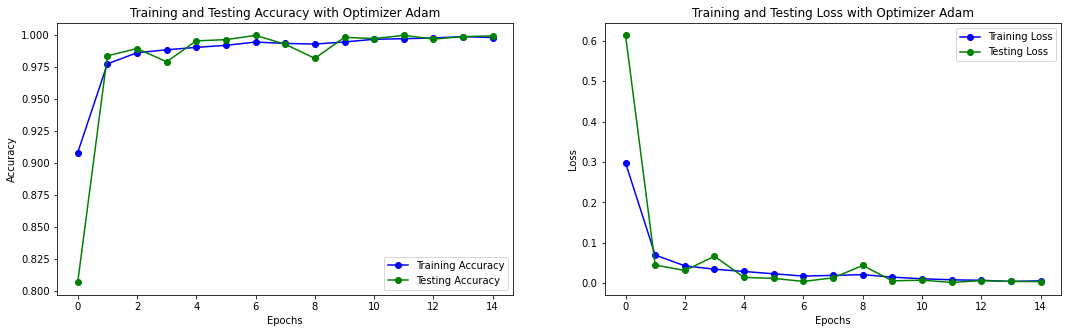

In [28]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_accuracy = model_best_optimizer1.history['accuracy']
train_loss = model_best_optimizer1.history['loss']
validation_accuracy = model_best_optimizer1.history['val_accuracy']
validation_loss = model_best_optimizer1.history['val_loss']
fig.set_size_inches(18,5)

ax[0].plot(epochs , train_accuracy , 'bo-' , label = 'Training Accuracy')
ax[0].plot(epochs , validation_accuracy , 'go-' , label = 'Testing Accuracy')
ax[0].set_title('Training and Testing Accuracy with Optimizer Adam')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'b-o' , label = 'Training Loss')
ax[1].plot(epochs , validation_loss , 'g-o' , label = 'Testing Loss')
ax[1].set_title('Training and Testing Loss with Optimizer Adam')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

## 3.8.3 Model Performance<a id='3.8.3_Model_Performance'></a>

We assess the performance of the model with adam optimizer in this section.

In [29]:
rounded_predictions = model_best.predict_classes(X_test, batch_size=128, verbose=1)
rounded_labels=np.argmax(y_test, axis=1)

57/57 [==============================] - 3s 59ms/step


In [30]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print('-----------------------------------------------------------')
print("Accuracy_test:",metrics.accuracy_score(rounded_labels, rounded_predictions))
print('-----------------------------------------------------------')
print(classification_report(rounded_labels, rounded_predictions, target_names = classes))

-----------------------------------------------------------
Accuracy_test: 0.9993028443948689
-----------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      0.99      0.99       348
     Class 7       0.99      1.00      0.99       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00  

In [31]:
cm = confusion_matrix(rounded_labels,rounded_predictions)
cm[:3]

array([[331,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 432,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 310,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

## 3.9 Model with SGD Optimizer<a id='3.9_SGD_Optimizer'></a>

In this section we use our base model with optimizer SGD.

In [32]:
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Flatten())
    model.add(Dense(units = 512 , activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units = 24 , activation = 'softmax'))
    model.compile(optimizer = Optimizer2, loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    return model

## 3.9.1 Hyperparameter Search using RandomSearch<a id='3.9.1_Hyperparameter_RandomSearch'></a>

Here, the hyperparameter are tuned using `keras-tuner`.

In [33]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy', directory='output2', max_trials=5)

In [34]:
tuner_search.search(X_train,y_train, batch_size = 128, 
                    epochs=10, validation_data = (X_test, y_test))

Trial 1 Complete [00h 07m 45s]
val_accuracy: 0.9446458220481873

Best val_accuracy So Far: 0.9446458220481873
Total elapsed time: 00h 07m 45s
INFO:tensorflow:Oracle triggered exit


We use `get_best_models()` of `tuner_search` to select the best model.

In [35]:
model_best=tuner_search.get_best_models(num_models=1)[0] #this will give us the best tuned model

In [36]:

model_best_optimizer2 = model_best.fit(data_augmented.flow(X_train,y_train, batch_size = 128) ,epochs = 15 , validation_data = (X_test, y_test))



Epoch 1/15
215/215 [==============================] - 50s 229ms/step - loss: 0.8056 - accuracy: 0.7597 - val_loss: 0.2740 - val_accuracy: 0.9112
Epoch 2/15
215/215 [==============================] - 49s 226ms/step - loss: 0.4459 - accuracy: 0.8543 - val_loss: 0.4318 - val_accuracy: 0.8516
Epoch 3/15
215/215 [==============================] - 49s 227ms/step - loss: 0.3524 - accuracy: 0.8878 - val_loss: 0.3730 - val_accuracy: 0.8875
Epoch 4/15
215/215 [==============================] - 49s 227ms/step - loss: 0.2784 - accuracy: 0.9116 - val_loss: 0.1252 - val_accuracy: 0.9699
Epoch 5/15
215/215 [==============================] - 50s 235ms/step - loss: 0.2390 - accuracy: 0.9234 - val_loss: 0.1784 - val_accuracy: 0.9424
Epoch 6/15
215/215 [==============================] - 49s 230ms/step - loss: 0.1901 - accuracy: 0.9405 - val_loss: 0.0840 - val_accuracy: 0.9810
Epoch 7/15
215/215 [==============================] - 49s 229ms/step - loss: 0.1765 - accuracy: 0.9444 - val_loss: 0.0718 - val_ac

## 3.9.2 Learning Curves<a id='3.9.2_Learning_Curve'></a>

In the next cell we plot the performance of the best model on the training data as well as the testing data. 

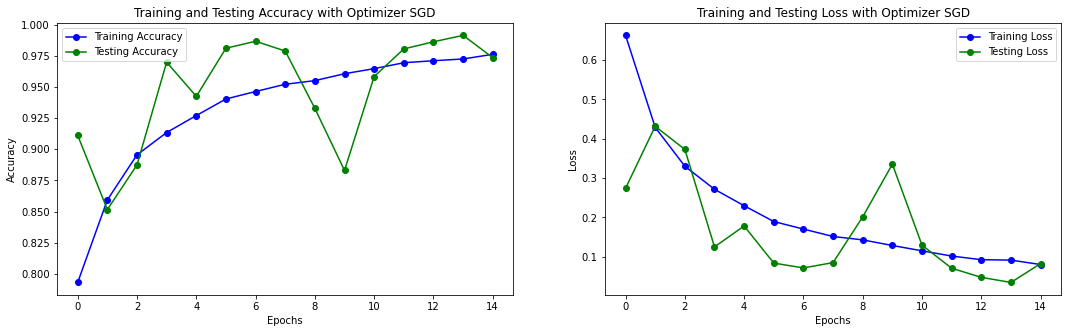

In [37]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_accuracy = model_best_optimizer2.history['accuracy']
train_loss = model_best_optimizer2.history['loss']
validation_accuracy = model_best_optimizer2.history['val_accuracy']
validation_loss = model_best_optimizer2.history['val_loss']
fig.set_size_inches(18,5)

ax[0].plot(epochs , train_accuracy , 'bo-' , label = 'Training Accuracy')
ax[0].plot(epochs , validation_accuracy , 'go-' , label = 'Testing Accuracy')
ax[0].set_title('Training and Testing Accuracy with Optimizer SGD')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'b-o' , label = 'Training Loss')
ax[1].plot(epochs , validation_loss , 'g-o' , label = 'Testing Loss')
ax[1].set_title('Training and Testing Loss with Optimizer SGD')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

## 3.9.3 Model Performance<a id='3.9.3_Model_Performance'></a>

We evaluate the performance of the model with SGD optimizer.

In [38]:
rounded_predictions = model_best.predict_classes(X_test, batch_size=128, verbose=1)
rounded_labels=np.argmax(y_test, axis=1)

57/57 [==============================] - 4s 67ms/step


In [39]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print('-----------------------------------------------------------')
print("Accuracy_test:",metrics.accuracy_score(rounded_labels, rounded_predictions))
print('-----------------------------------------------------------')
print(classification_report(rounded_labels, rounded_predictions, target_names = classes))

-----------------------------------------------------------
Accuracy_test: 0.9735080870050196
-----------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      0.97      0.98       245
     Class 4       0.96      0.92      0.94       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      0.92      0.96       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       0.97      1.00      0.99       331
    Class 11       1.00      1.00      1.00       209
    Class 12       0.94      0.85      0.89       394
    Class 13       0.83      1.00      0.91       291
    Class 14       1.00      0.97      0.98       246
    Class 15       0.97      1.00  

In [40]:
cm = confusion_matrix(rounded_labels,rounded_predictions)
cm[:3]

array([[331,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 432,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 310,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

## 3.10 Model with AdaGrad Optimizer<a id='3.10_Adagrad_Optimizer'></a>

In this section we use our base model with optimizer AdaGrad.

In [41]:
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Flatten())
    model.add(Dense(units = 512 , activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units = 24 , activation = 'softmax'))
    model.compile(optimizer = Optimizer3, loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    return model

## 3.10.1 Hyperparameter Search using RandomSearch<a id='3.10.1_Hyperparameter_RandomSearch'></a>

The hyperparameters are tuned using `keras-tuner`.

In [42]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy', directory='output3', max_trials=5)

In [43]:

tuner_search.search(X_train,y_train, batch_size = 128, 
                    epochs=10, validation_data = (X_test, y_test))



Trial 1 Complete [00h 08m 35s]
val_accuracy: 0.8742331266403198

Best val_accuracy So Far: 0.8742331266403198
Total elapsed time: 00h 08m 35s
INFO:tensorflow:Oracle triggered exit


In [44]:
model_best=tuner_search.get_best_models(num_models=1)[0] #this will give us the best tuned model

In [45]:
model_best_optimizer3=model_best.fit(data_augmented.flow(X_train,y_train, batch_size = 128) ,epochs = 15 , validation_data = (X_test, y_test))



Epoch 1/15
215/215 [==============================] - 52s 241ms/step - loss: 1.0878 - accuracy: 0.6604 - val_loss: 0.4784 - val_accuracy: 0.8780
Epoch 2/15
215/215 [==============================] - 52s 244ms/step - loss: 0.9796 - accuracy: 0.6840 - val_loss: 0.4654 - val_accuracy: 0.8749
Epoch 3/15
215/215 [==============================] - 54s 249ms/step - loss: 0.8768 - accuracy: 0.7187 - val_loss: 0.4189 - val_accuracy: 0.8847
Epoch 4/15
215/215 [==============================] - 52s 244ms/step - loss: 0.8172 - accuracy: 0.7378 - val_loss: 0.3947 - val_accuracy: 0.9044
Epoch 5/15
215/215 [==============================] - 52s 239ms/step - loss: 0.7802 - accuracy: 0.7521 - val_loss: 0.3886 - val_accuracy: 0.9050
Epoch 6/15
215/215 [==============================] - 51s 236ms/step - loss: 0.7311 - accuracy: 0.7626 - val_loss: 0.3783 - val_accuracy: 0.9032
Epoch 7/15
215/215 [==============================] - 50s 235ms/step - loss: 0.7088 - accuracy: 0.7709 - val_loss: 0.3519 - val_ac

## 3.10.2 Learning Curve<a id='3.10.2_Learning_Curve'></a>

We visualize the performance of the model with AdaGrad optimizer with respect to each epoch.

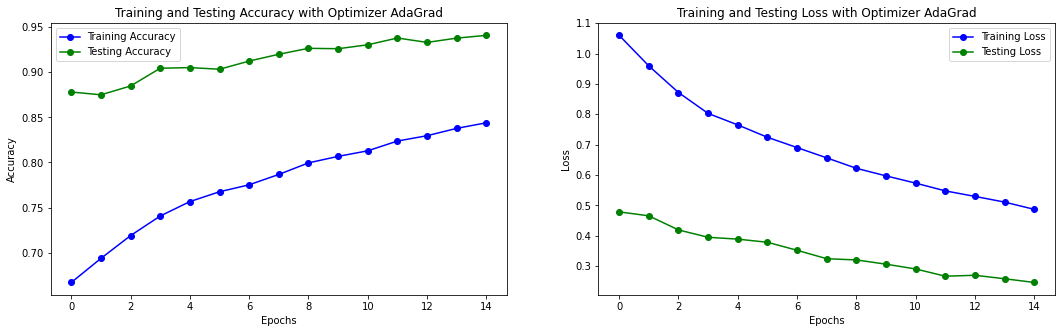

In [50]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_accuracy = model_best_optimizer3.history['accuracy']
train_loss = model_best_optimizer3.history['loss']
validation_accuracy = model_best_optimizer3.history['val_accuracy']
validation_loss = model_best_optimizer3.history['val_loss']
fig.set_size_inches(18,5)

ax[0].plot(epochs , train_accuracy , 'bo-' , label = 'Training Accuracy')
ax[0].plot(epochs , validation_accuracy , 'go-' , label = 'Testing Accuracy')
ax[0].set_title('Training and Testing Accuracy with Optimizer AdaGrad')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'b-o' , label = 'Training Loss')
ax[1].plot(epochs , validation_loss , 'g-o' , label = 'Testing Loss')
ax[1].set_title('Training and Testing Loss with Optimizer AdaGrad')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

## 3.10.3 Model Performance<a id='3.10.3_Model_Performance'></a>

In this section, we evaluate our last model.

In [47]:
rounded_predictions = model_best.predict_classes(X_test, batch_size=128, verbose=1)
rounded_labels=np.argmax(y_test, axis=1)

57/57 [==============================] - 3s 58ms/step


In [48]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print('-----------------------------------------------------------')
print("Accuracy_test:",metrics.accuracy_score(rounded_labels, rounded_predictions))
print('-----------------------------------------------------------')
print(classification_report(rounded_labels, rounded_predictions, target_names = classes))

-----------------------------------------------------------
Accuracy_test: 0.9407417735638595
-----------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      0.98      0.99       310
     Class 3       0.90      1.00      0.95       245
     Class 4       0.90      0.97      0.93       498
     Class 5       0.98      0.97      0.97       247
     Class 6       0.86      0.95      0.90       348
     Class 7       0.95      0.93      0.94       436
     Class 8       0.94      1.00      0.97       288
    Class 10       1.00      0.84      0.91       331
    Class 11       0.92      1.00      0.96       209
    Class 12       0.94      0.90      0.92       394
    Class 13       0.84      0.90      0.87       291
    Class 14       1.00      0.93      0.96       246
    Class 15       1.00      1.00  

In [49]:
cm = confusion_matrix(rounded_labels,rounded_predictions)
cm[:3]

array([[331,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 432,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 304,   0,   0,   6,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

## 3.11 Final Model Selection<a id='3.11_final_model_selection'></a>

#### After analyzing multiple models, we observe the following:

* The model with AdaGrad optimizer has approximately 94% accuracy score. This is the lowest score among the 3 models we have tried. 
* The model with SGD optimizer has approximately 97% accuracy score. This is the second best score we get.
* The model with Adam optimizer has approximately 99% accuracy score which is the best. This model also has the highest score for precision, recall and f1 across all classes. 

Thereby, we pick the tuned model with Adam optimizer. 